# Linear Regression
### Notebook by [Kevin Huang](https://kevin8523.github.io/)

In [31]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

***Set up dataset into a dataframe to practice ML***

In [32]:
# datasets
boston = load_boston()

In [33]:
# Set up data in a dataframe like a realworld problem
df = pd.DataFrame(data = boston.data)

In [34]:
# Name columns
df.columns = boston.feature_names

In [35]:
# Add Price feature >> Target or Y Variable
df["PRICE"] = boston.target

In [36]:
# Convert Chas to Categorical for practice
df['CHAS'] = df['CHAS'].replace([0], 'Charles River')
df['CHAS'] = df['CHAS'].replace([1], 'Tract Bounds River')

In [37]:
# Show values on a category
df["RAD"].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

***Description of Variables***

1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per 10,000
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. PRICE - Median value of owner-occupied homes in $1000's

***Summary Statistics***

In [38]:
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,Charles River,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,Charles River,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,Charles River,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,Charles River,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,Charles River,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


***Missing Data***

In [39]:
## Taking care of missing data
# from sklearn.preprocessing import Imputer
# imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
# imputer = imputer.fit(X[:, 1:3])
# X[:, 1:3] = imputer.transform(X[:, 1:3])

***Setup data for ML***

In [40]:
# Import Libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [41]:
# Split for train and test as vectors
# : for the list >> [row selection, column seleciton]
X = df.iloc[:, :-1].values # [:, :-1] >> [all rows, all columns except last one]
y = df.iloc[:, 13].values # all rows and just column 13

***Encoding Categorical Variable*** <br/>
Since it is NOT ordered, Use OneHotEncoder <br/>

In [42]:
# Encoding the Independent Variable after Vectorizing
# *** NOTE: Moves the encoded variable to the first column >> column0
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3]) #Column3 >> Orders categories by abc order
onehotencoder = OneHotEncoder(categorical_features = [3]) #Column3
X = onehotencoder.fit_transform(X).toarray()

//anaconda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:351: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
//anaconda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:373: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Double check how the OneHotEncoder labeled the categories <br/>
- Charles River == 1
- Tract River == 0

***You should probably remove one of the columns for the categorical variable. In this example I did not, but see the other linear regression examples for a better workflow***

In [43]:
## Avoid Dummy Variable Trap
## Number of categories minus 1 >> i.e: for Sex just have 1, the constant term will include the other. 
## For Days in week >> 6
# X = X[:, 1:] #Since there are two categories, we dont need to remove any variables since there is only 1 variable

## Encoding the Dependent Variable
# labelencoder_y = LabelEncoder()
# y = labelencoder_y.fit_transform(y)

***Split the dataset: Train & test set for CV***

In [44]:
# from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 14)
(152, 14)
(354,)
(152,)


In [46]:
## Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)
# sc_y = StandardScaler()
# y_train = sc_y.fit_transform(y_train)"""

***Apply ML***

In [47]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

In [48]:
# Instantiate Model
lm = LinearRegression()

# Fit data to model
lm.fit(X_train, y_train)

# Predict 
y_pred = lm.predict(X_test)

In [49]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(mse)

30.69703770408881


In [50]:
# Score
print(lm.score(X_train,y_train))
print(lm.score(X_test,y_test))

0.7611598772034454
0.6771696999851669


In [51]:
y_pred.shape

(152,)

***Visualize Data***

In [52]:
# Import Libraries
import matplotlib.pyplot as plt

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

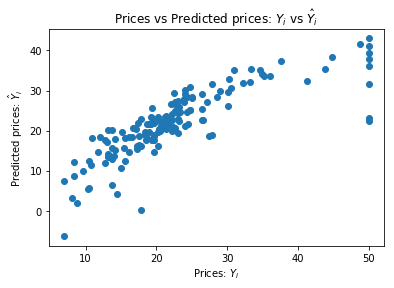

In [53]:
# Plot Visual
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

### Update Model by building optimal model using Backward Elimination

In [54]:
import statsmodels.formula.api as sm

In [55]:
X.shape

(506, 14)

***For Backwards Elimination in statsmodels, it doesn't take into account the b0 constant term. We need to add it manually by adding the array 1 to our X***

In [56]:
# np.append(arr=X
#          , values = np.ones(shape=(506,1)).astype(int)
#          , axis=1) # Puts array 1 at the END of the the array X
X_var = np.append(arr=np.ones(shape=(506,1)).astype(int)
         , values = X
         , axis = 1) # Flips it so array 1 is at the front of array X
print(X_var.shape)
X_var

(506, 15)


array([[  1.  ,   1.  ,   0.  , ...,  15.3 , 396.9 ,   4.98],
       [  1.  ,   1.  ,   0.  , ...,  17.8 , 396.9 ,   9.14],
       [  1.  ,   1.  ,   0.  , ...,  17.8 , 392.83,   4.03],
       ...,
       [  1.  ,   1.  ,   0.  , ...,  21.  , 396.9 ,   5.64],
       [  1.  ,   1.  ,   0.  , ...,  21.  , 393.45,   6.48],
       [  1.  ,   1.  ,   0.  , ...,  21.  , 396.9 ,   7.88]])

In [64]:
# Optimal Features for model >> Statisically sig. Variables
X_opt = X_var[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]]

In [65]:
# Create the model again since we're using a diff library
# Initialize the model
regressor_OLS = sm.OLS(endog=y , exog=X_opt).fit()

In [66]:
# Backwards Elim process
# >> Remove highest p-value until < .05 or satisfied
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 13 Oct 2018   Prob (F-statistic):          6.72e-135
Time:                        17:56:56   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.2019      3.407      7.398      0.000      18.509      31.895
x1            11.2576      1.733      6.496      0.000       7.853      14.662
x2            13.9443      1.781      7.831      0.000      10.446      17.443
x3            -0.1080      0.033     -3.287      0.001      -0.173      -0.043
x4             0.0464      0.014      3.382      0.001       0.019       0.073
x5             0.0206      0.061      0.334      0.738      -0.100       0.141
x6           -17.7666      3.820     -4.651      0.000     -25.272     -10.262
x7             3.8099      0.418      9.116      0.000       2.989       4.631
x8             0.0007      0.013      0.052      0.958      -0.025       0.027
x9            -1.4756      0.199     -7.398      0.000      -1.867      -1.084
x10            0.3060      0.066      4.613      0.000       0.176       0.436
x11           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
x12           -0.9527      0.131     -7.283      0.000      -1.210      -0.696
x13            0.0093      0.003      3.467      0.001       0.004       0.015
x14           -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.39e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.21e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [68]:
# Optimal Features for model >> Statisically sig. Variables
X_opt = X_var[:,[0, 1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14]]

# Create the model again since we're using a diff library
# Initialize the model
regressor_OLS = sm.OLS(endog=y , exog=X_opt).fit()

# Begin Backwards Elimination >> Remove highest p-value
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sat, 13 Oct 2018   Prob (F-statistic):          5.54e-137
Time:                        17:58:39   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.1337      3.385      7.424      0.000      18.482      31.785
x1            11.2075      1.718      6.524      0.000       7.832      14.583
x2            13.9262      1.773      7.854      0.000      10.442      17.410
x3            -0.1084      0.033     -3.307      0.001      -0.173      -0.044
x4             0.0458      0.014      3.390      0.001       0.019       0.072
x5           -17.3760      3.535     -4.915      0.000     -24.322     -10.430
x6             3.8016      0.406      9.356      0.000       3.003       4.600
x7            -1.4927      0.186     -8.037      0.000      -1.858      -1.128
x8             0.2996      0.063      4.726      0.000       0.175       0.424
x9            -0.0118      0.003     -3.493      0.001      -0.018      -0.005
x10           -0.9465      0.129     -7.334      0.000      -1.200      -0.693
x11            0.0093      0.003      3.475      0.001       0.004       0.015
x12           -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     6.34e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.88e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Using updated variables, re-run regression for the optimal model

In [69]:
# Update the dataframe to only select sig. variables
df_v2 = df.iloc[:, :]
df_v2 = df_v2.drop(['INDUS','AGE']
          ,axis=1
          ,inplace=False)

In [70]:
# Confirm correct Columns removed
df_v2.head()

,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,Charles River,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,Charles River,0.469,6.421,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,Charles River,0.469,7.185,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,Charles River,0.458,6.998,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,Charles River,0.458,7.147,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


***Repeat the above steps as the baseline model, this time without INDUS & Age***